In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import sys
import seaborn as sns
from operator import itemgetter
import math
from scipy import stats 
from prettytable import PrettyTable

In [4]:
vdfx = pd.read_csv("../csv/vivado_dct.csv")
cdfx = pd.read_csv("../csv/catapult_dct_latency.csv")
li=[]
viv_violin=pd.read_csv("../csv/vivado_dct_violin.csv",index_col=None)
li.append(viv_violin)
cat_violin=pd.read_csv("../csv/catapult_dct_latency_violin.csv",index_col=None)
li.append(cat_violin)
violin=pd.concat(li, axis=0, ignore_index=True,sort='False')
l2=[]
l2.append(violin)
cdfx['throughput'] = cdfx['obj1'].min()*1/cdfx['obj1']
vdfx['throughput'] = cdfx['obj1'].min()*1/vdfx['obj1']
cdfx['ff_inv'] = 1/cdfx['ff']
vdfx['ff_inv'] = 1/vdfx['ff']
cdfx['lut_inv'] = 1/cdfx['lut']
vdfx['lut_inv'] = 1/vdfx['lut']
cdfx['1/obj2'] = cdfx['obj2'].min()*1/cdfx['obj2']
vdfx['1/obj2'] = cdfx['obj2'].min()*1/vdfx['obj2']
cdfx['clbUtil'] = cdfx['obj2']/147780
vdfx['clbUtil'] = vdfx['obj2']/147780
# drop columns, regularize knobs  
cdfx['mem_partition_size1'] = cdfx['knob_array_partition2']
vdfx['mem_partition_size1'] = 4194304/(vdfx['knob_array_partition'])
cdfx['mem_partition_size2'] = cdfx['knob_array_partition1']
vdfx['mem_partition_size2'] = 16/(vdfx['knob_array_partition'])                   
cdfx = cdfx.drop(columns=['knob_I_B'])
cdfx = cdfx.drop(columns=['knob_array_partition1'])
cdfx = cdfx.drop(columns=['knob_array_partition2'])                                
vdfx = vdfx.drop(columns=['knob_array_partition'])

Text(0.5, 1.0, 'DCT Combined Design Space')

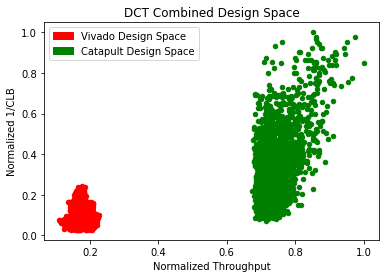

In [5]:
ax1 = vdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Vivado Design Space')
green_data = mpatches.Patch(color='green', label='Catapult Design Space')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput')
plt.ylabel('Normalized 1/CLB')
plt.title("DCT Combined Design Space")

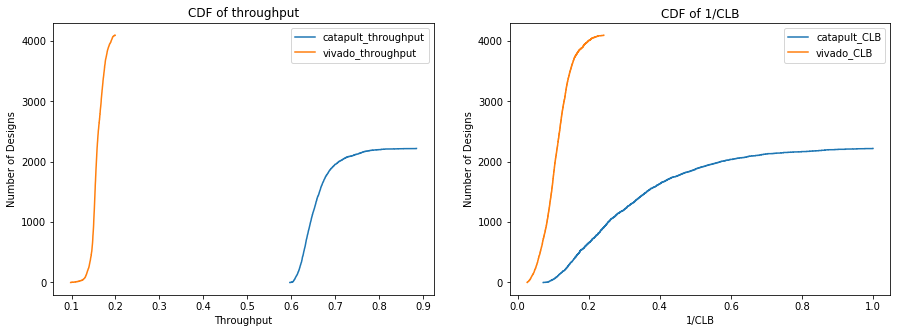

In [3]:
cdfx['1/obj1']=1/cdfx['obj1']
vdfx['1/obj1']=1/vdfx['obj1']

sorted_data_cat=np.sort(cdfx['1/obj1'])
sorted_data_viv=np.sort(vdfx['1/obj1'])
sorted_data_cat2=np.sort(cdfx['1/obj2'])
sorted_data_viv2=np.sort(vdfx['1/obj2'])
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.step(np.concatenate([sorted_data_cat, sorted_data_cat[[-1]]]),np.arange(sorted_data_cat.size+1),label='catapult_throughput')
plt.step(np.concatenate([sorted_data_viv, sorted_data_viv[[-1]]]),np.arange(sorted_data_viv.size+1),label='vivado_throughput')
plt.xlabel('Throughput')
plt.ylabel('Number of Designs')
plt.title('CDF of throughput')

plt.legend()
plt.subplot(1,2,2)
plt.step(np.concatenate([sorted_data_cat2, sorted_data_cat2[[-1]]]),np.arange(sorted_data_cat2.size+1),label='catapult_CLB')
plt.step(np.concatenate([sorted_data_viv2, sorted_data_viv2[[-1]]]),np.arange(sorted_data_viv2.size+1),label='vivado_CLB')
plt.xlabel('1/CLB')
plt.ylabel('Number of Designs')
plt.title('CDF of 1/CLB')

plt.legend()

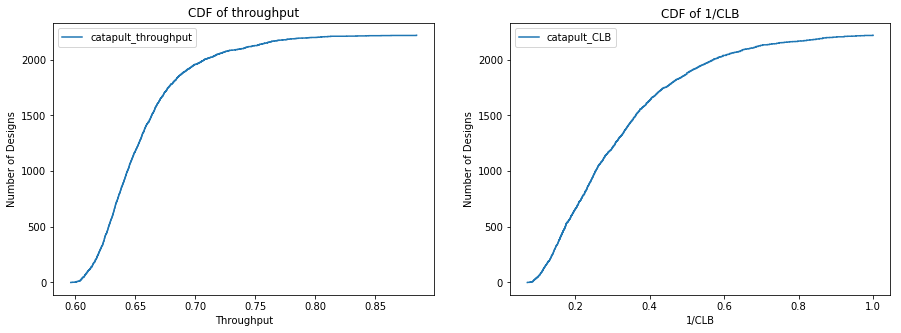

In [4]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.step(np.concatenate([sorted_data_cat, sorted_data_cat[[-1]]]),np.arange(sorted_data_cat.size+1),label='catapult_throughput')
plt.xlabel('Throughput')
plt.ylabel('Number of Designs')
plt.title('CDF of throughput')

plt.legend()
plt.subplot(1,2,2)
plt.step(np.concatenate([sorted_data_cat2, sorted_data_cat2[[-1]]]),np.arange(sorted_data_cat2.size+1),label='catapult_CLB')
plt.xlabel('1/CLB')
plt.ylabel('Number of Designs')
plt.title('CDF of 1/CLB')

plt.legend()


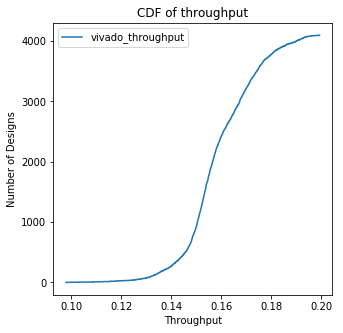

In [15]:
plt.figure(figsize=(5, 5))
plt.step(np.concatenate([sorted_data_viv, sorted_data_viv[[-1]]]),np.arange(sorted_data_viv.size+1),label='vivado_throughput')
plt.xlabel('Throughput')
plt.ylabel('Number of Designs')
plt.title('CDF of throughput')
plt.savefig('vivado_cdf.svg')
plt.legend()


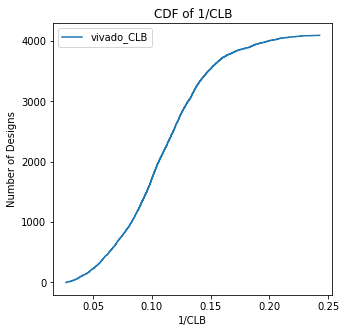

In [16]:
plt.figure(figsize=(5, 5))
plt.step(np.concatenate([sorted_data_viv2, sorted_data_viv2[[-1]]]),np.arange(sorted_data_viv2.size+1),label='vivado_CLB')
plt.xlabel('1/CLB')
plt.ylabel('Number of Designs')
plt.title('CDF of 1/CLB')
plt.savefig('vivado_cdf_2.svg')
plt.legend()

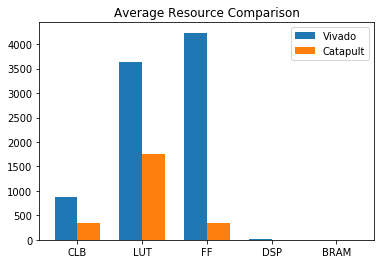

In [6]:
fig, ax = plt.subplots()

N=5
vivado_val=(vdfx['obj2'].mean(),vdfx['lut'].mean(),vdfx['ff'].mean(),vdfx['dsp'].mean(),vdfx['bram'].mean())
catapult_val=(cdfx['obj2'].mean(),cdfx['lut'].mean(),cdfx['ff'].mean(),cdfx['dsp'].mean(),cdfx['bram'].mean())

ind = np.arange(N)
width = 0.35 

p1=ax.bar(ind,vivado_val,width,label='vivado')
p2=ax.bar(ind+width,catapult_val,width,label='catapult')

ax.set_title('Average Resource Comparison')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('CLB', 'LUT', 'FF', 'DSP', 'BRAM'))

ax.legend((p1[0], p2[0]), ('Vivado', 'Catapult'))

ax.autoscale_view()
plt.show()

Text(0.5, 1.0, 'Resource Distribution')

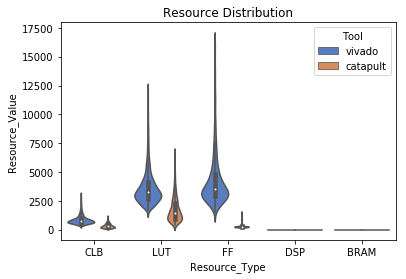

In [7]:
ax = sns.violinplot(x="Resource_Type", y="Resource_Value", hue="Tool",
                    data=violin, palette="muted",
                    scale="count")
plt.title("Resource Distribution")

0.17978742794949795 0.7425362455523662


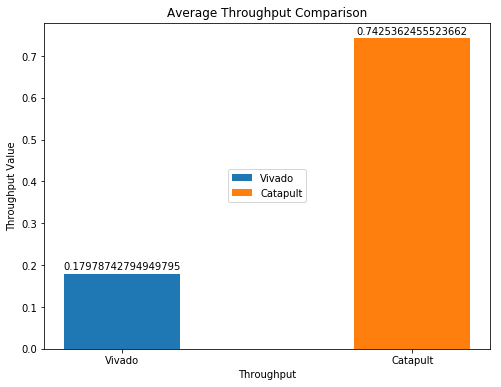

In [8]:
fig, ax = plt.subplots()

vivado_val=(vdfx['throughput'].mean())
catapult_val=(cdfx['throughput'].mean())
print(vivado_val,catapult_val)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
fig.set_size_inches(8, 6, forward=True)
ind1=[0,0.025]
width = 0.01 
labels=['Vivado','Catapult']
p1=ax.bar(0,vivado_val,width,label='vivado')
p2=ax.bar(0.025,catapult_val,width,label='catapult')

ax.set_title('Average Throughput Comparison')
ax.set_xlabel('Throughput')
ax.set_ylabel('Throughput Value')
ax.set_xticks(ind1)
ax.set_xticklabels(labels)

autolabel(p1)
autolabel(p2)
ax.legend((p1[0], p2[0]), ('Vivado', 'Catapult'),loc="center")

plt.show()

Text(0.5, 1.0, 'Throughput Distribution')

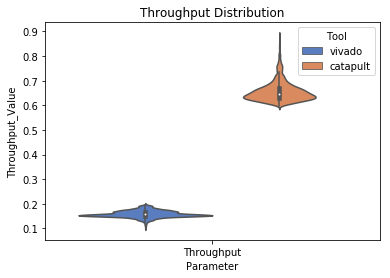

In [9]:
ax=sns.violinplot(x="Parameter",y="Throughput_Value",data=violin,hue="Tool",palette="muted",scale="count")
plt.title("Throughput Distribution")

In [10]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, on=['knob_blockdim_x','knob_blockdim_y','knob_unroll_dct','knob_unroll_width', 'knob_unroll_height', 'mem_partition_size2'], how='inner')


(0, 1)

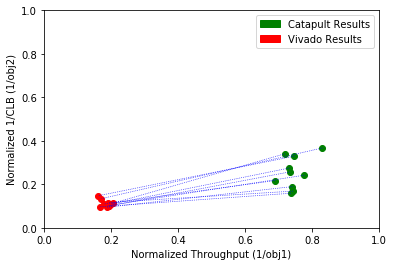

In [11]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)
plt.xlim(0, 1)

(0, 0.003)

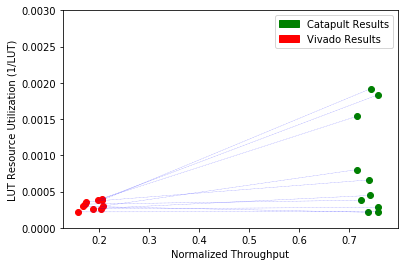

In [12]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample.lut_inv_x, x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample.lut_inv_y, x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['lut_inv_x'], row['lut_inv_y']],'b:',linewidth=0.3)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput')
plt.ylabel('LUT Resource Utilization (1/LUT)')
plt.ylim(0, 0.003)

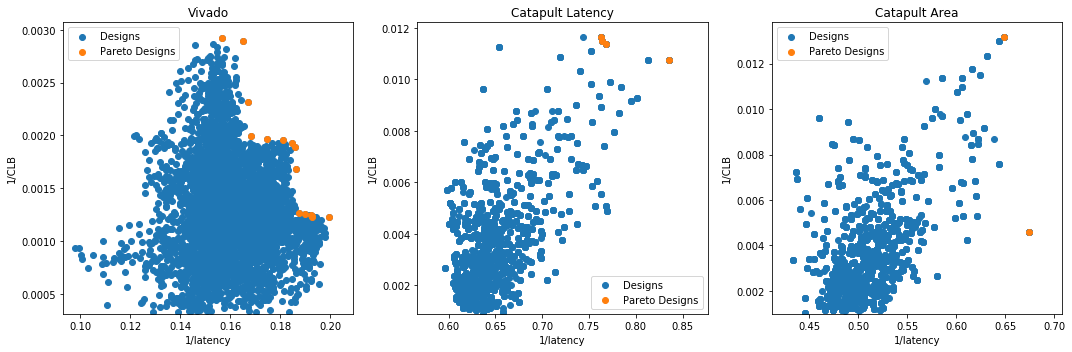

In [19]:
sys.path.append('./pareto_files')
from utils import adrs, read_design_space, approximate_pareto


X1, y1, _, names1, _ = read_design_space('../csv/vivado_dct_sherlock.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

X2, y2, _, names2, _ = read_design_space('../csv/catapult_dct_latency_sherlock.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

X3, y3, _, names3, _ = read_design_space('../csv/catapult_dct_area_sherlock.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)



plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
y_pareto1 = approximate_pareto(y1)[0]
y_pareto1_index = approximate_pareto(y1)[1]
plt.scatter(y1[:,0], y1[:,1],label='Designs')
plt.legend()
plt.scatter(y_pareto1[:,0], y_pareto1[:,1],label='Pareto Designs')
plt.legend()
plt.title("Vivado")
plt.xlabel("1/" + "latency")
plt.ylabel("1/" + "CLB")
plt.xlim(left=y1[:,0].min()*0.95, right=y1[:,0].max()*1.05)
plt.ylim(bottom=y1[:,1].min()*0.95, top=y1[:,1].max()*1.05)
plt.tight_layout()


plt.subplot(1,3,2)
y_pareto2 = approximate_pareto(y2)[0]
y_pareto2_index = approximate_pareto(y2)[1]
plt.scatter(y2[:,0], y2[:,1],label='Designs')
plt.legend()
plt.scatter(y_pareto2[:,0], y_pareto2[:,1],label='Pareto Designs')
plt.legend()
plt.title("Catapult Latency")
plt.xlabel("1/" + "latency")
plt.ylabel("1/" + "CLB")
plt.xlim(left=y2[:,0].min()*0.95, right=y2[:,0].max()*1.05)
plt.ylim(bottom=y2[:,1].min()*0.95, top=y2[:,1].max()*1.05)
plt.tight_layout()


plt.subplot(1,3,3)
y_pareto3 = approximate_pareto(y3)[0]
y_pareto3_index = approximate_pareto(y3)[1]
plt.scatter(y3[:,0], y3[:,1],label='Designs')
plt.legend()
plt.scatter(y_pareto3[:,0], y_pareto3[:,1],label='Pareto Designs')
plt.legend()
plt.title("Catapult Area")
plt.xlabel("1/" + "latency")
plt.ylabel("1/" + "CLB")
plt.xlim(left=y3[:,0].min()*0.95, right=y3[:,0].max()*1.05)
plt.ylim(bottom=y3[:,1].min()*0.95, top=y3[:,1].max()*1.05)
plt.tight_layout()

IndexError: list index out of range

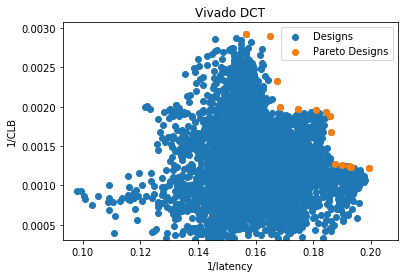

In [20]:
y_pareto1 = approximate_pareto(y1)[0]
y_pareto1_index = approximate_pareto(y1)[1]
plt.scatter(y1[:,0], y1[:,1],label='Designs')
plt.legend()
plt.scatter(y_pareto1[:,0], y_pareto1[:,1],label='Pareto Designs')
plt.legend()
plt.title("Vivado DCT")
plt.xlabel("1/" + "latency")
plt.ylabel("1/" + "CLB")
plt.xlim(left=y1[:,0].min()*0.95, right=y1[:,0].max()*1.05)
plt.ylim(bottom=y1[:,1].min()*0.95, top=y1[:,1].max()*1.05)
for i in range(len(y_pareto1_index)-1):
    plt.plot([y_pareto1_sorted[i][1],y_pareto1_sorted[i+1][1]],[y_pareto1_sorted[i][2],y_pareto1_sorted[i+1][2]],'green',linewidth=3,label="Pareto Front")
green_data = mpatches.Patch(color='green', label='Pareto Front')
orange_data=mpatches.Patch(color='orange',label="Pareto Designs")
blue_data=mpatches.Patch(color='blue',label="Designs ")
plt.legend(handles=[green_data,orange_data,blue_data])
plt.tight_layout()

In [ ]:
plt.scatter(y_pareto1[:,0], y_pareto1[:,1],c='r')
plt.scatter(y_pareto2[:,0], y_pareto2[:,1],c='g')
plt.scatter(y_pareto3[:,0], y_pareto3[:,1],c='b')


red_data = mpatches.Patch(color='red', label='Vivado Results')
green_data = mpatches.Patch(color='green', label='Catapult Latency Results')
blue_data=mpatches.Patch(color='blue',label='Catapult Area Results')
plt.legend(handles=[red_data, green_data,blue_data])
plt.xlabel('1/latency')
plt.ylabel('CLB Resource Utilization (1/CLB)')
plt.title("Pareto Comparisons")
plt.ylim(0.000)

In [ ]:
plt.scatter(y_pareto1[:,0], y_pareto1[:,1],c='r')
plt.scatter(y_pareto2[:,0], y_pareto2[:,1],c='g')


red_data = mpatches.Patch(color='red', label='Vivado Results')
green_data = mpatches.Patch(color='green', label='Catapult Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('1/latency')
plt.ylabel('CLB Resource Utilization (1/CLB)')
plt.title("Pareto Comparisons")
plt.ylim(0.000)

In [ ]:
vivdfx = pd.read_csv("../csv/vivado_dct_sherlock.csv", index_col=0)
c_latdfx = pd.read_csv("../csv/catapult_dct_latency_sherlock.csv", index_col=0)
c_areadfx = pd.read_csv("../csv/catapult_dct_area_sherlock.csv", index_col=0)

In [21]:
y_pareto1_sorted=[]
y_pareto2_sorted=[]
y_pareto3_sorted=[]
for i in range(len(y_pareto1_index)):
    y_pareto1_sorted.append((i,y_pareto1[i][0],y_pareto1[i][1]))
y_pareto1_sorted=sorted(y_pareto1_sorted, key=itemgetter(2))

for i in range(len(y_pareto2_index)):
    y_pareto2_sorted.append((i,y_pareto2[i][0],y_pareto2[i][1]))
y_pareto2_sorted=sorted(y_pareto2_sorted, key=itemgetter(2))

for i in range(len(y_pareto3_index)):
    y_pareto3_sorted.append((i,y_pareto3[i][0],y_pareto3[i][1]))
y_pareto3_sorted=sorted(y_pareto3_sorted, key=itemgetter(2))

In [22]:
def euclid(a,b,c,d):
    t=math.sqrt(((a-b)**2)+((c-d)**2))
    return t

In [23]:
viv_esp=0.0003
c_lat_esp=0.0003
c_area_esp=0.0003

In [24]:
vivdfx_copy=vivdfx.copy()
for i in y_pareto1_index:
    vivdfx_copy=vivdfx_copy.drop(index=i)
viv_pts=[]
for i in range(len(y_pareto1_index)):
    for index,row in vivdfx_copy.iterrows():
        if euclid(1/row['obj1'],y_pareto1[i][0],1/row['obj2'],y_pareto1[i][1])<viv_esp:
            if index in viv_pts:
                pass
            else:
                viv_pts.append(index)

c_latdfx_copy=c_latdfx.copy()
for i in y_pareto2_index:
    c_latdfx_copy=c_latdfx_copy.drop(index=i)
c_lat_pts=[]
for i in range(len(y_pareto2_index)):
    for index,row in c_latdfx_copy.iterrows():
        if euclid(1/row['obj1'],y_pareto2[i][0],1/row['obj2'],y_pareto2[i][1])<c_lat_esp:
            if index in c_lat_pts:
                pass
            else:
                c_lat_pts.append(index)
                
                
c_areadfx_copy=c_areadfx.copy()
for i in y_pareto3_index:
    c_areadfx_copy=c_areadfx_copy.drop(index=i)
c_area_pts=[]
for i in range(len(y_pareto3_index)):
    for index,row in c_areadfx_copy.iterrows():
        if euclid(1/row['obj1'],y_pareto3[i][0],1/row['obj2'],y_pareto3[i][1])<c_area_esp:
            if index in c_area_pts:
                pass
            else:
                c_area_pts.append(index)

In [25]:
li=[]
for i in y_pareto1_index:
    t1=c_latdfx.loc[(c_latdfx["knob_blockdim_x"]==vivdfx.loc[i]["knob_blockdim_x"]) & (c_latdfx["knob_blockdim_y"]==vivdfx.loc[i]["knob_blockdim_y"])& (c_latdfx["knob_unroll_dct"]==vivdfx.loc[i]["knob_unroll_dct"])& (c_latdfx["knob_unroll_width"]==vivdfx.loc[i]["knob_unroll_width"])& (c_latdfx["knob_unroll_height"]==vivdfx.loc[i]["knob_unroll_height"])& (c_latdfx["knob_array_partition1"]==vivdfx.loc[i]["knob_array_partition"])]
    t2=c_areadfx.loc[(c_areadfx["knob_blockdim_x"]==vivdfx.loc[i]["knob_blockdim_x"]) & (c_areadfx["knob_blockdim_y"]==vivdfx.loc[i]["knob_blockdim_y"])& (c_areadfx["knob_unroll_dct"]==vivdfx.loc[i]["knob_unroll_dct"])& (c_areadfx["knob_unroll_width"]==vivdfx.loc[i]["knob_unroll_width"])& (c_areadfx["knob_unroll_height"]==vivdfx.loc[i]["knob_unroll_height"])& (c_areadfx["knob_array_partition1"]==vivdfx.loc[i]["knob_array_partition"])]
    li.append((t1,i,t2))
    
li2=[]
for i in viv_pts:
    t1=c_latdfx.loc[(c_latdfx["knob_blockdim_x"]==vivdfx_copy.loc[i]["knob_blockdim_x"]) & (c_latdfx["knob_blockdim_y"]==vivdfx_copy.loc[i]["knob_blockdim_y"])& (c_latdfx["knob_unroll_dct"]==vivdfx_copy.loc[i]["knob_unroll_dct"])& (c_latdfx["knob_unroll_width"]==vivdfx_copy.loc[i]["knob_unroll_width"])& (c_latdfx["knob_unroll_height"]==vivdfx_copy.loc[i]["knob_unroll_height"])& (c_latdfx["knob_array_partition1"]==vivdfx_copy.loc[i]["knob_array_partition"])]
    t2=c_areadfx.loc[(c_areadfx["knob_blockdim_x"]==vivdfx_copy.loc[i]["knob_blockdim_x"]) & (c_areadfx["knob_blockdim_y"]==vivdfx_copy.loc[i]["knob_blockdim_y"])& (c_areadfx["knob_unroll_dct"]==vivdfx_copy.loc[i]["knob_unroll_dct"])& (c_areadfx["knob_unroll_width"]==vivdfx_copy.loc[i]["knob_unroll_width"])& (c_areadfx["knob_unroll_height"]==vivdfx_copy.loc[i]["knob_unroll_height"])& (c_areadfx["knob_array_partition1"]==vivdfx_copy.loc[i]["knob_array_partition"])]
    li2.append((t1,i,t2))

Text(0, 0.5, 'CLB Resource Utilization (1/CLB)')

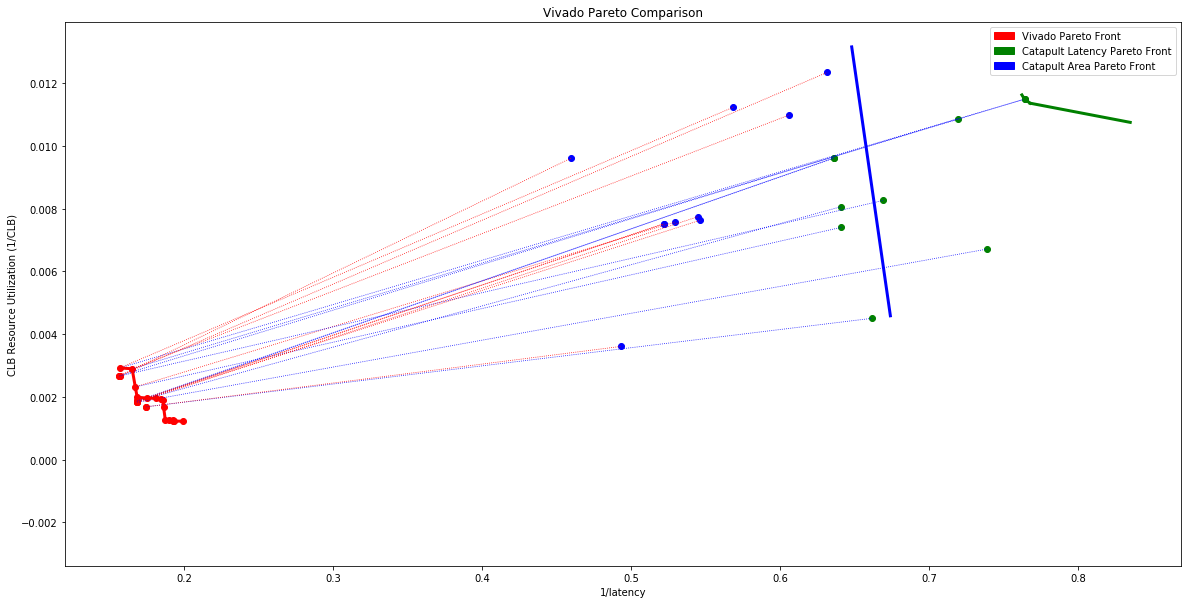

In [26]:
plt.figure(figsize=(20,10))


for i in range(len(li)):
    plt.scatter(x=y_pareto1[i][0], y=y_pareto1[i][1], c='r')
    if li[i][0].empty==False: 
        a=li[i][0].get_values()

        plt.scatter(x=1/(a[0][8]), y=1/(a[0][9]), c='g') 
    
    if li[i][2].empty==False:
        b=li[i][2].get_values()
        plt.scatter(x=1/(b[0][8]), y=1/(b[0][9]), c='b') 

for i in range(len(li)):
    if li[i][0].empty==False: 
        a=li[i][0].get_values()
        plt.plot([y_pareto1[i][0], 1/(a[0][8])],[y_pareto1[i][1], 1/a[0][9]],'b:',linewidth=0.8)
    if li[i][2].empty==False:
        b=li[i][2].get_values()
        plt.plot([y_pareto1[i][0], 1/(b[0][8])],[y_pareto1[i][1], 1/b[0][9]],'r:',linewidth=0.8)       


for i in range(len(li2)):

    if li2[i][0].empty==False: 
        a=li2[i][0].get_values()
        plt.scatter(x=1/vivdfx_copy.loc[li2[i][1]]['obj1'], y=1/vivdfx_copy.loc[li2[i][1]]['obj2'], c='r')
        plt.scatter(x=1/(a[0][8]), y=1/(a[0][9]), c='g') 
    
    if li2[i][2].empty==False:
        b=li2[i][2].get_values()
        plt.scatter(x=1/vivdfx_copy.loc[li2[i][1]]['obj1'], y=1/vivdfx_copy.loc[li2[i][1]]['obj2'], c='r')        
        plt.scatter(x=1/(b[0][8]), y=1/(b[0][9]), c='b') 

for i in range(len(li2)):
    if li2[i][0].empty==False: 
        a=li2[i][0].get_values()
        plt.plot([1/vivdfx_copy.loc[li2[i][1]]['obj1'], 1/(a[0][8])],[1/vivdfx_copy.loc[li2[i][1]]['obj2'], 1/a[0][9]],'b:',linewidth=0.8)
    if li2[i][2].empty==False:
        b=li2[i][2].get_values()
        plt.plot([1/vivdfx_copy.loc[li2[i][1]]['obj1'], 1/(b[0][8])],[1/vivdfx_copy.loc[li2[i][1]]['obj2'], 1/b[0][9]],'r:',linewidth=0.8)    
        
        

for i in range(len(y_pareto1_index)-1):
    plt.plot([y_pareto1_sorted[i][1],y_pareto1_sorted[i+1][1]],[y_pareto1_sorted[i][2],y_pareto1_sorted[i+1][2]],'red',linewidth=3)
for i in range(len(y_pareto2_index)-1):
    plt.plot([y_pareto2_sorted[i][1],y_pareto2_sorted[i+1][1]],[y_pareto2_sorted[i][2],y_pareto2_sorted[i+1][2]],'green',linewidth=3)
for i in range(len(y_pareto3_index)-1):
    plt.plot([y_pareto3_sorted[i][1],y_pareto3_sorted[i+1][1]],[y_pareto3_sorted[i][2],y_pareto3_sorted[i+1][2]],'blue',linewidth=3)
red_data = mpatches.Patch(color='red', label='Vivado Pareto Front ')
green_data = mpatches.Patch(color='green', label='Catapult Latency Pareto Front')
blue_data = mpatches.Patch(color='blue', label='Catapult Area Pareto Front')
plt.legend(handles=[red_data, green_data,blue_data])
plt.title('Vivado Pareto Comparison')
plt.xlabel('1/latency')
plt.ylabel('CLB Resource Utilization (1/CLB)')

In [27]:
li=[]
for i in y_pareto2_index:
    t1=vivdfx.loc[(vivdfx["knob_blockdim_x"]==c_latdfx.loc[i]["knob_blockdim_x"]) & (vivdfx["knob_blockdim_y"]==c_latdfx.loc[i]["knob_blockdim_y"])& (vivdfx["knob_unroll_dct"]==c_latdfx.loc[i]["knob_unroll_dct"])& (vivdfx["knob_unroll_width"]==c_latdfx.loc[i]["knob_unroll_width"])& (vivdfx["knob_unroll_height"]==c_latdfx.loc[i]["knob_unroll_height"])& (vivdfx["knob_array_partition"]==c_latdfx.loc[i]["knob_array_partition1"])]
    t2=c_areadfx.loc[(c_areadfx["knob_blockdim_x"]==c_latdfx.loc[i]["knob_blockdim_x"]) & (c_areadfx["knob_blockdim_y"]==c_latdfx.loc[i]["knob_blockdim_y"])& (c_areadfx["knob_unroll_dct"]==c_latdfx.loc[i]["knob_unroll_dct"])& (c_areadfx["knob_unroll_width"]==c_latdfx.loc[i]["knob_unroll_width"])& (c_areadfx["knob_unroll_height"]==c_latdfx.loc[i]["knob_unroll_height"])& (c_areadfx["knob_array_partition1"]==c_latdfx.loc[i]["knob_array_partition1"])]
    li.append((t1,i,t2))

    
li2=[]
for i in c_lat_pts:
    t1=vivdfx.loc[(vivdfx["knob_blockdim_x"]==c_latdfx_copy.loc[i]["knob_blockdim_x"]) & (vivdfx["knob_blockdim_y"]==c_latdfx_copy.loc[i]["knob_blockdim_y"])& (vivdfx["knob_unroll_dct"]==c_latdfx_copy.loc[i]["knob_unroll_dct"])& (vivdfx["knob_unroll_width"]==c_latdfx_copy.loc[i]["knob_unroll_width"])& (vivdfx["knob_unroll_height"]==c_latdfx_copy.loc[i]["knob_unroll_height"])& (vivdfx["knob_array_partition"]==c_latdfx_copy.loc[i]["knob_array_partition1"])]
    t2=c_areadfx.loc[(c_areadfx["knob_blockdim_x"]==c_latdfx_copy.loc[i]["knob_blockdim_x"]) & (c_areadfx["knob_blockdim_y"]==c_latdfx_copy.loc[i]["knob_blockdim_y"])& (c_areadfx["knob_unroll_dct"]==c_latdfx_copy.loc[i]["knob_unroll_dct"])& (c_areadfx["knob_unroll_width"]==c_latdfx_copy.loc[i]["knob_unroll_width"])& (c_areadfx["knob_unroll_height"]==c_latdfx_copy.loc[i]["knob_unroll_height"])& (c_areadfx["knob_array_partition1"]==c_latdfx_copy.loc[i]["knob_array_partition1"])]
    li2.append((t1,i,t2))

Text(0, 0.5, 'CLB Resource Utilization (1/CLB)')

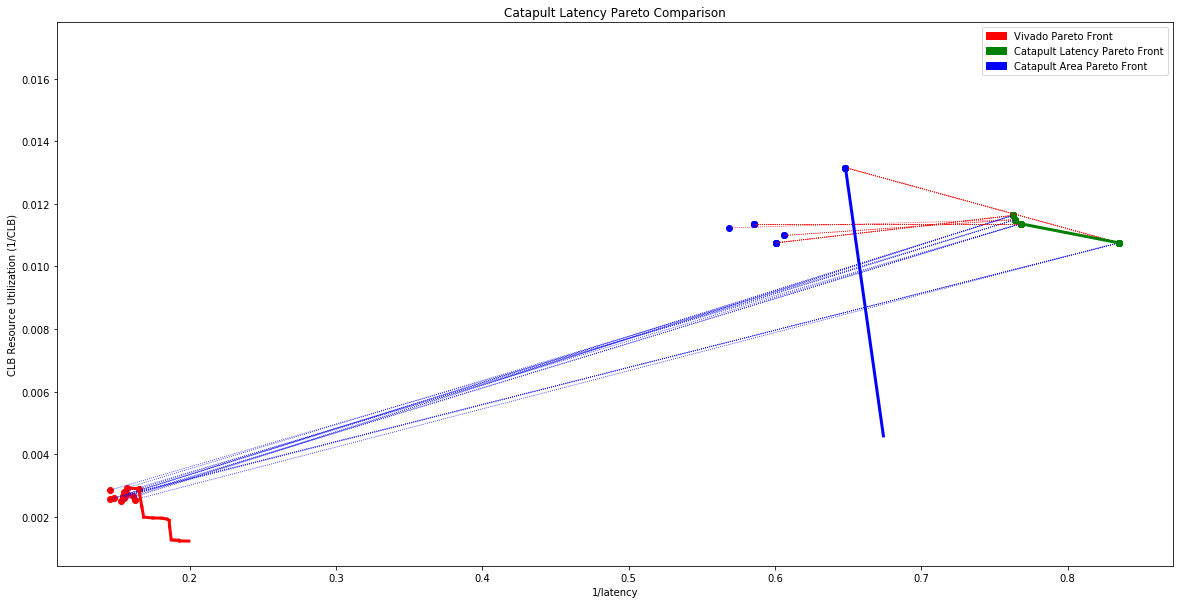

In [28]:
plt.figure(figsize=(20,10))
for i in range(len(li)):
    plt.scatter(x=y_pareto2[i][0], y=y_pareto2[i][1], c='g')
    if li[i][0].empty==False: 
        a=li[i][0].get_values()

        plt.scatter(x=1/(a[0][6]), y=1/(a[0][7]), c='r') 
    
    if li[i][2].empty==False:
        b=li[i][2].get_values()
        plt.scatter(x=1/(b[0][8]), y=1/(b[0][9]), c='b') 

for i in range(len(li)):
    if li[i][0].empty==False: 
        a=li[i][0].get_values()
        plt.plot([y_pareto2[i][0], 1/(a[0][6])],[y_pareto2[i][1], 1/a[0][7]],'b:',linewidth=0.8)

    if li[i][2].empty==False:
        b=li[i][2].get_values()
        plt.plot([y_pareto2[i][0], 1/(b[0][8])],[y_pareto2[i][1], 1/b[0][9]],'r:',linewidth=0.8)
        
        
for i in range(len(li2)):

    if li2[i][0].empty==False: 
        a=li2[i][0].get_values()
        plt.scatter(x=1/c_latdfx_copy.loc[li2[i][1]]['obj1'], y=1/c_latdfx_copy.loc[li2[i][1]]['obj2'], c='g')
        plt.scatter(x=1/(a[0][6]), y=1/(a[0][7]), c='r') 
    
    if li2[i][2].empty==False:
        b=li2[i][2].get_values()
        plt.scatter(x=1/c_latdfx_copy.loc[li2[i][1]]['obj1'], y=1/c_latdfx_copy.loc[li2[i][1]]['obj2'], c='g')        
        plt.scatter(x=1/(b[0][8]), y=1/(b[0][9]), c='b') 

for i in range(len(li2)):
    if li2[i][0].empty==False: 
        a=li2[i][0].get_values()
        plt.plot([1/c_latdfx_copy.loc[li2[i][1]]['obj1'], 1/(a[0][6])],[1/c_latdfx_copy.loc[li2[i][1]]['obj2'], 1/a[0][7]],'b:',linewidth=0.8)
    if li2[i][2].empty==False:
        b=li2[i][2].get_values()
        plt.plot([1/c_latdfx_copy.loc[li2[i][1]]['obj1'], 1/(b[0][8])],[1/c_latdfx_copy.loc[li2[i][1]]['obj2'], 1/b[0][9]],'r:',linewidth=0.8)    


for i in range(len(y_pareto1_index)-1):
    plt.plot([y_pareto1_sorted[i][1],y_pareto1_sorted[i+1][1]],[y_pareto1_sorted[i][2],y_pareto1_sorted[i+1][2]],'red',linewidth=3)
for i in range(len(y_pareto2_index)-1):
    plt.plot([y_pareto2_sorted[i][1],y_pareto2_sorted[i+1][1]],[y_pareto2_sorted[i][2],y_pareto2_sorted[i+1][2]],'green',linewidth=3)
for i in range(len(y_pareto3_index)-1):
    plt.plot([y_pareto3_sorted[i][1],y_pareto3_sorted[i+1][1]],[y_pareto3_sorted[i][2],y_pareto3_sorted[i+1][2]],'blue',linewidth=3)
red_data = mpatches.Patch(color='red', label='Vivado Pareto Front ')
green_data = mpatches.Patch(color='green', label='Catapult Latency Pareto Front')
blue_data = mpatches.Patch(color='blue', label='Catapult Area Pareto Front')
plt.legend(handles=[red_data, green_data,blue_data])
plt.title('Catapult Latency Pareto Comparison')
plt.xlabel('1/latency')
plt.ylabel('CLB Resource Utilization (1/CLB)')

In [29]:
li=[]
for i in y_pareto3_index:
    t1=vivdfx.loc[(vivdfx["knob_blockdim_x"]==c_areadfx.loc[i]["knob_blockdim_x"]) & (vivdfx["knob_blockdim_y"]==c_areadfx.loc[i]["knob_blockdim_y"])& (vivdfx["knob_unroll_dct"]==c_areadfx.loc[i]["knob_unroll_dct"])& (vivdfx["knob_unroll_width"]==c_areadfx.loc[i]["knob_unroll_width"])& (vivdfx["knob_unroll_height"]==c_areadfx.loc[i]["knob_unroll_height"])& (vivdfx["knob_array_partition"]==c_areadfx.loc[i]["knob_array_partition1"])]
    t2=c_latdfx.loc[(c_latdfx["knob_blockdim_x"]==c_areadfx.loc[i]["knob_blockdim_x"]) & (c_latdfx["knob_blockdim_y"]==c_areadfx.loc[i]["knob_blockdim_y"])& (c_latdfx["knob_unroll_dct"]==c_areadfx.loc[i]["knob_unroll_dct"])& (c_latdfx["knob_unroll_width"]==c_areadfx.loc[i]["knob_unroll_width"])& (c_latdfx["knob_unroll_height"]==c_areadfx.loc[i]["knob_unroll_height"])& (c_latdfx["knob_array_partition1"]==c_areadfx.loc[i]["knob_array_partition1"])]
    li.append((t1,i,t2))
    
li2=[]
for i in c_area_pts:
    t1=vivdfx.loc[(vivdfx["knob_blockdim_x"]==c_areadfx_copy.loc[i]["knob_blockdim_x"]) & (vivdfx["knob_blockdim_y"]==c_areadfx_copy.loc[i]["knob_blockdim_y"])& (vivdfx["knob_unroll_dct"]==c_areadfx_copy.loc[i]["knob_unroll_dct"])& (vivdfx["knob_unroll_width"]==c_areadfx_copy.loc[i]["knob_unroll_width"])& (vivdfx["knob_unroll_height"]==c_areadfx_copy.loc[i]["knob_unroll_height"])& (vivdfx["knob_array_partition"]==c_areadfx_copy.loc[i]["knob_array_partition1"])]
    t2=c_latdfx.loc[(c_latdfx["knob_blockdim_x"]==c_areadfx_copy.loc[i]["knob_blockdim_x"]) & (c_latdfx["knob_blockdim_y"]==c_areadfx_copy.loc[i]["knob_blockdim_y"])& (c_latdfx["knob_unroll_dct"]==c_areadfx_copy.loc[i]["knob_unroll_dct"])& (c_latdfx["knob_unroll_width"]==c_areadfx_copy.loc[i]["knob_unroll_width"])& (c_latdfx["knob_unroll_height"]==c_areadfx_copy.loc[i]["knob_unroll_height"])& (c_latdfx["knob_array_partition1"]==c_areadfx_copy.loc[i]["knob_array_partition1"])]
    li2.append((t1,i,t2))

Text(0, 0.5, 'CLB Resource Utilization (1/CLB)')

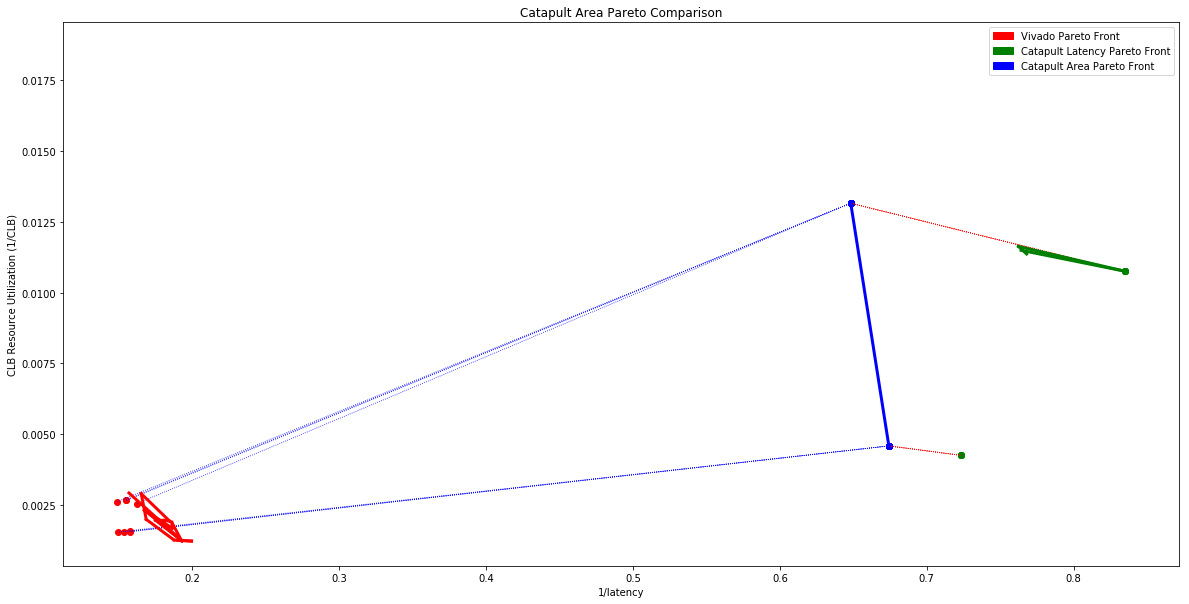

In [30]:


plt.figure(figsize=(20,10))
for i in range(len(li)):
    plt.scatter(x=y_pareto3[i][0], y=y_pareto3[i][1], c='b')
    if li[i][0].empty==False: 
        a=li[i][0].get_values()

        plt.scatter(x=1/(a[0][6]), y=1/(a[0][7]), c='r') 
    if li[i][2].empty==False:
        b=li[i][2].get_values()
        plt.scatter(x=y_pareto3[i][0], y=y_pareto3[i][1], c='b')
        plt.scatter(x=1/(b[0][8]), y=1/(b[0][9]), c='g') 

for i in range(len(li)):
    if li[i][0].empty==False: 
        a=li[i][0].get_values()
        plt.plot([y_pareto3[i][0], 1/(a[0][6])],[y_pareto3[i][1], 1/a[0][7]],'b:',linewidth=0.8)
    if li[i][2].empty==False:
        b=li[i][2].get_values()
        plt.plot([y_pareto3[i][0], 1/(b[0][8])],[y_pareto3[i][1], 1/b[0][9]],'r:',linewidth=0.8)

for i in range(len(li2)):
    if li2[i][0].empty==False: 
        a=li2[i][0].get_values()
        plt.scatter(x=1/c_areadfx_copy.loc[li2[i][1]]['obj1'], y=1/c_areadfx_copy.loc[li2[i][1]]['obj2'], c='b')
        plt.scatter(x=1/(a[0][6]), y=1/(a[0][7]), c='r') 
    if li2[i][2].empty==False:
        b=li2[i][2].get_values()
        plt.scatter(x=1/c_areadfx_copy.loc[li2[i][1]]['obj1'], y=1/c_areadfx_copy.loc[li2[i][1]]['obj2'], c='b')
        plt.scatter(x=1/(b[0][8]), y=1/(b[0][9]), c='g') 

for i in range(len(li2)):
    if li2[i][0].empty==False: 
        a=li2[i][0].get_values()
        plt.plot([1/c_areadfx_copy.loc[li2[i][1]]['obj1'], 1/(a[0][6])],[1/c_areadfx_copy.loc[li2[i][1]]['obj2'], 1/a[0][7]],'b:',linewidth=0.8)
    if li2[i][2].empty==False:
        b=li2[i][2].get_values()
        plt.plot([1/c_areadfx_copy.loc[li2[i][1]]['obj1'], 1/(b[0][8])],[1/c_areadfx_copy.loc[li2[i][1]]['obj2'], 1/b[0][9]],'r:',linewidth=0.8)    

        
red_data = mpatches.Patch(color='red', label='Vivado Pareto')
green_data = mpatches.Patch(color='green', label='Catapult Latency Points')
blue_data = mpatches.Patch(color='blue', label='Catapult Area Points')
for i in range(len(y_pareto1_index)-1):
    plt.plot([y_pareto1[i][0],y_pareto1[i+1][0]],[y_pareto1[i][1],y_pareto1[i+1][1]],'red',linewidth=3)
for i in range(len(y_pareto2_index)-1):
    plt.plot([y_pareto2[i][0],y_pareto2[i+1][0]],[y_pareto2[i][1],y_pareto2[i+1][1]],'green',linewidth=3)
for i in range(len(y_pareto3_index)-1):
    plt.plot([y_pareto3[i][0],y_pareto3[i+1][0]],[y_pareto3[i][1],y_pareto3[i+1][1]],'blue',linewidth=3)
red_data = mpatches.Patch(color='red', label='Vivado Pareto Front')
green_data = mpatches.Patch(color='green', label='Catapult Latency Pareto Front')
blue_data = mpatches.Patch(color='blue', label='Catapult Area Pareto Front')
plt.legend(handles=[red_data, green_data,blue_data])
plt.title('Catapult Area Pareto Comparison')
plt.xlabel('1/latency')
plt.ylabel('CLB Resource Utilization (1/CLB)')



In [35]:
c_area_adrs=[]
for index,row in c_areadfx_copy.iterrows():
    min_val=1000000
    for i in range(len(y_pareto3_index)):
        a=euclid(1/row['obj1'],y_pareto3[i][0],1/row['obj2'],y_pareto3[i][1])
        if a<min_val:
            min_val=a
    c_area_adrs.append(min_val)

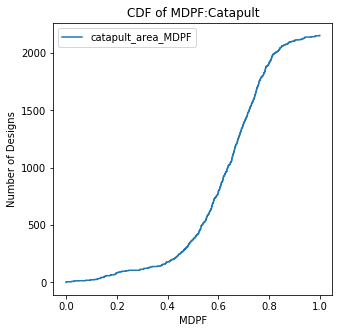

In [40]:
sorted_c_area_adrs=np.sort(c_area_adrs)
sorted_c_area_adrs1=np.sort(c_area_adrs)
sorted_c_area_adrs=sorted_c_area_adrs/sorted_c_area_adrs.max()

plt.figure(figsize=(5, 5))
plt.step(np.concatenate([sorted_c_area_adrs, sorted_c_area_adrs[[-1]]]),np.arange(sorted_c_area_adrs.size+1),label='catapult_area_MDPF')
plt.xlabel('MDPF')
plt.ylabel('Number of Designs')
plt.title('CDF of MDPF:Catapult')
plt.savefig('catapult_mdpf.svg')

plt.legend()

In [41]:
viv_adrs=[]
for index,row in vivdfx_copy.iterrows():
    min_val=1000000
    for i in range(len(y_pareto1_index)):
        a=euclid(1/row['obj1'],y_pareto1[i][0],1/row['obj2'],y_pareto1[i][1])
        if a<min_val:
            min_val=a
    viv_adrs.append(min_val)

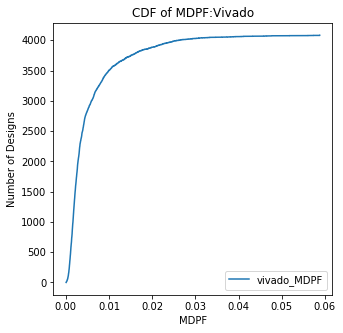

In [42]:
sorted_viv_adrs=np.sort(viv_adrs)
sorted_viv_adrs1=np.sort(viv_adrs)
sorted_viv_adrs=sorted_viv_adrs/sorted_c_area_adrs.max()

plt.figure(figsize=(5, 5))
plt.step(np.concatenate([sorted_viv_adrs, sorted_viv_adrs[[-1]]]),np.arange(sorted_viv_adrs.size+1),label='vivado_MDPF')
plt.xlabel('MDPF')
plt.ylabel('Number of Designs')
plt.title('CDF of MDPF:Vivado')
plt.savefig('vivado_mdpf.svg')

plt.legend()

In [30]:
c_lat_adrs=[]
for index,row in c_latdfx_copy.iterrows():
    min_val=1000000
    for i in range(len(y_pareto2_index)):
        a=euclid(1/row['obj1'],y_pareto2[i][0],1/row['obj2'],y_pareto2[i][1])
        if a<min_val:
            min_val=a
    c_lat_adrs.append(min_val)

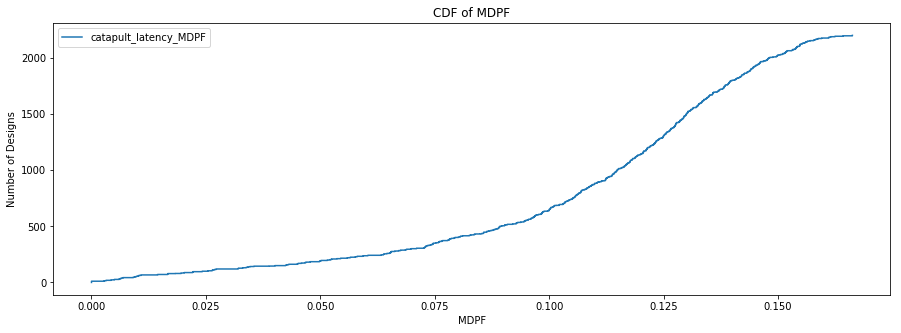

In [31]:
sorted_c_lat_adrs=np.sort(c_lat_adrs)
sorted_c_lat_adrs1=np.sort(c_lat_adrs)
sorted_c_lat_adrs=sorted_c_lat_adrs/sorted_c_area_adrs.max()

plt.figure(figsize=(15, 5))
plt.step(np.concatenate([sorted_c_lat_adrs, sorted_c_lat_adrs[[-1]]]),np.arange(sorted_c_lat_adrs.size+1),label='catapult_latency_MDPF')
plt.xlabel('MDPF')
plt.ylabel('Number of Designs')
plt.title('CDF of MDPF')


plt.legend()

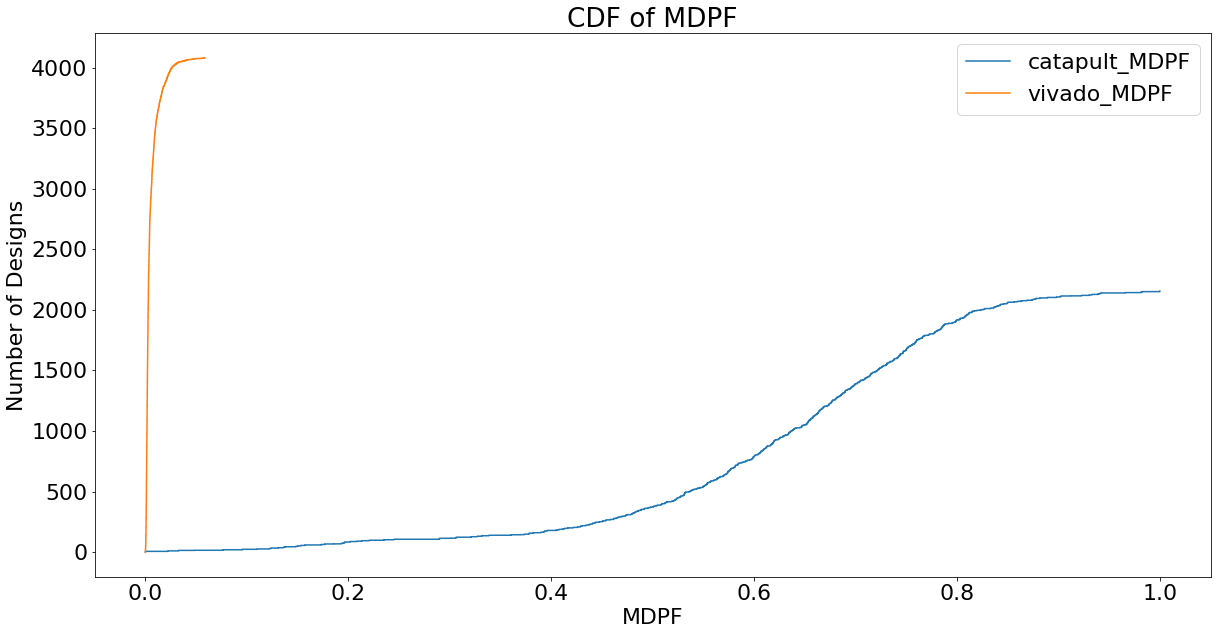

In [33]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 22})
plt.step(np.concatenate([sorted_c_area_adrs, sorted_c_area_adrs[[-1]]]),np.arange(sorted_c_area_adrs.size+1),label='catapult_MDPF')
plt.step(np.concatenate([sorted_viv_adrs, sorted_viv_adrs[[-1]]]),np.arange(sorted_viv_adrs.size+1),label='vivado_MDPF')
plt.xlabel('MDPF')
plt.ylabel('Number of Designs')
plt.title('CDF of MDPF')

plt.legend()

/home/elakkiap/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: p-value floored: true value smaller than 0.001


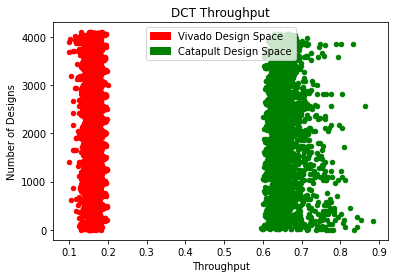

In [24]:
cdfx['throughput'] = 1/cdfx['obj1']
vdfx['throughput'] = 1/vdfx['obj1']
cdfx['area'] = 1/cdfx['obj2']
vdfx['area'] = 1/vdfx['obj2']

#plots
ax1 = vdfx.plot(x='throughput', y='n', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='n', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Vivado Design Space')
green_data = mpatches.Patch(color='green', label='Catapult Design Space')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput')
plt.ylabel('Number of Designs')
plt.title("DCT Throughput")

latency_tp = np.array(cdfx['throughput'])
vivado_tp = np.array(vdfx['throughput'])
t1, p1 = stats.ttest_ind(latency_tp,vivado_tp)
D1,P1 = stats.ks_2samp(latency_tp, vivado_tp)
statistic1, critical_value1, p_value1 = stats.anderson_ksamp([latency_tp, vivado_tp])
count = 0
for i in critical_value1:
    if(statistic1 < i):
        count = count + 1
if count == len(critical_value1):
    AD_Obs1 = True
else:
    AD_Obs1 = False
Actual1 = False

/home/elakkiap/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: p-value floored: true value smaller than 0.001


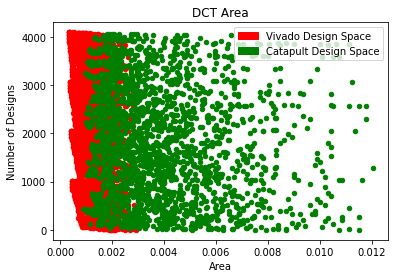

In [22]:
ax1 = vdfx.plot(x='area', y='n', kind='scatter', c='r')
ax = cdfx.plot(x='area', y='n', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Vivado Design Space')
green_data = mpatches.Patch(color='green', label='Catapult Design Space')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Area')
plt.ylabel('Number of Designs')
plt.title("DCT Area")


latency_slices = np.array(cdfx['area'])
vivado_slices = np.array(vdfx['area'])
t2, p2 = stats.ttest_ind(latency_slices,vivado_slices)
D2,P2 = stats.ks_2samp(latency_slices, vivado_slices)
statistic2, critical_value2, p_value2 = stats.anderson_ksamp([latency_slices, vivado_slices])
count = 0
for i in critical_value2:
    if(statistic2 < i):
        count = count + 1
if count == len(critical_value2):
    AD_Obs2 = True
else:
    AD_Obs2 = False
Actual2 = False

In [26]:
x = PrettyTable()
y = PrettyTable()
Benchmark = "DCT"
Samples1= "Vivado-Catapult--TP"
Samples2 = "Vivado-Catapult--Area"
ttest="ttest"
kstest="KS-test"
adtest="AD-test"
comma = ","
expt1 = ((t1 < 0.05)and(p1>0.1))
expk1=((D1 < 0.05)and(P1>0.1))
expt2 = ((t2 < 0.05)and(p2>0.1))
expk2=((D2 < 0.05)and(P2>0.1))
x.field_names = ["Benchmark", "Samples", "Test", "Statistic", "P-value", "Observation"]
x.add_row([Benchmark, Samples1, ttest, float("{:.6f}".format(t1)), float("{:.6f}".format(p1)), expt1])
x.add_row([Benchmark, Samples1, kstest, float("{:.6f}".format(D1)), float("{:.6f}".format(P1)),expk1])
x.add_row([Benchmark, Samples1, adtest, float("{:.6f}".format(statistic1)), float("{:.6f}".format(p_value1)), AD_Obs1])
x.add_row([Benchmark, Samples2, ttest, float("{:.6f}".format(t2)), float("{:.6f}".format(p2)), expt2])
x.add_row([Benchmark, Samples2, kstest, float("{:.6f}".format(D2)), float("{:.6f}".format(P2)), expk2])
x.add_row([Benchmark, Samples2, adtest, float("{:.6f}".format(statistic2)), float("{:.6f}".format(p_value2)), AD_Obs1])
print(x)
file1=open('../../../GOF/gof.csv','w')
file1.write("Benchmark" + "," + "Samples" + "," + "Test" + "," + "Statistic" + "," + "P-Value" + "," + "Observation" + "\n")
file1.write(Benchmark + comma + Samples1 + comma + ttest + comma + str(float("{:.6f}".format(t1))) + comma + str(float("{:.6f}".format(p1))) + comma + str(expt1) + "\n" )
file1.write(Benchmark + comma + Samples1 + comma + kstest + comma + str(float("{:.6f}".format(D1))) + comma + str(float("{:.6f}".format(P1))) + comma + str(expk1) + "\n" )
file1.write(Benchmark + comma + Samples1 + comma + adtest + comma + str(float("{:.6f}".format(statistic1))) + comma + str(float("{:.6f}".format(p_value1))) + comma + str(AD_Obs1) +"\n" )
file1.write(Benchmark + comma + Samples2 + comma + ttest + comma + str(float("{:.6f}".format(t2))) + comma + str(float("{:.6f}".format(p2))) + comma + str(expt2) +  "\n" )
file1.write(Benchmark + comma + Samples2 + comma + kstest + comma + str(float("{:.6f}".format(D2))) + comma + str(float("{:.6f}".format(P2))) + comma + str(expk2) +  "\n" )
file1.write(Benchmark + comma + Samples2 + comma + adtest + comma + str(float("{:.6f}".format(statistic2))) + comma + str(float("{:.6f}".format(p_value2))) + comma + str(AD_Obs2) +  "\n" )
#passing the test and giving verdict as true if atleast 2 of the tests pass
v1 = [expt1, expk1, AD_Obs1]
v2 = [expt2, expk2, AD_Obs2]
n1 = 0
n2 = 0
for i in v1:
    if i == True:
        n1 = n1 + 1
if n1 >= 2:
    verdict1 = "Similar Design Spaces"
else:
    verdict1 = "Dissimilar Design Spaces"
    
for i in v2:
    if i == True:
        n2 = n2 + 1
if n2 >= 2:
    verdict2 = "Similar Design Spaces"
else:
    verdict2 = "Dissimilar Design Spaces"
    

y.field_names = ["Benchmark", "Samples", "Verdict"]
y.add_row([Benchmark, Samples1, verdict1])
y.add_row([Benchmark, Samples2, verdict2])
print("Summarising the Results for DCT Vivado vs Catapult Design Space")
print(y)

file2=open('../../../GOF/results.csv','w')
file2.write("Benchmark" + "," + "Samples" + "," + "Verdict" + "\n")
file2.write(Benchmark + comma + Samples1 + comma + str(verdict1) + "\n" )
file2.write(Benchmark + comma + Samples2 + comma + str(verdict2) + "\n" )

+-----------+-----------------------+---------+-------------+---------+-------------+
| Benchmark |        Samples        |   Test  |  Statistic  | P-value | Observation |
+-----------+-----------------------+---------+-------------+---------+-------------+
|    DCT    |  Vivado-Catapult--TP  |  ttest  |  728.124169 |   0.0   |    False    |
|    DCT    |  Vivado-Catapult--TP  | KS-test |     1.0     |   0.0   |    False    |
|    DCT    |  Vivado-Catapult--TP  | AD-test | 3033.674885 |  0.001  |    False    |
|    DCT    | Vivado-Catapult--Area |  ttest  |  73.059759  |   0.0   |    False    |
|    DCT    | Vivado-Catapult--Area | KS-test |   0.730275  |   0.0   |    False    |
|    DCT    | Vivado-Catapult--Area | AD-test | 2274.792274 |  0.001  |    False    |
+-----------+-----------------------+---------+-------------+---------+-------------+
Summarising the Results for DCT Vivado vs Catapult Design Space
+-----------+-----------------------+--------------------------+
| Benchmark

51